# Neural Network (Iris Dataset)

In [2]:
# To Clear the Tranform Computational Graph
%reset -f

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Create a Model class that inherite nn.Module
class Model(nn.Module):

    def __init__(self, input_features = 4, hidden_layer_1 = 10, hidden_layer_2 = 8, output_features = 3):
        super().__init__() #inherit the __init__ from the super class nn.Module
        # Create the network of neurons
        self.forward_conn_1 = nn.Linear(input_features, hidden_layer_1)
        self.forward_conn_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.out = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        # Forward pass the input into the created neural network
        x = F.relu(self.forward_conn_1(x))
        x = F.relu(self.forward_conn_2(x))
        x = self.out(x)

        return x

## Reason for selecting 2 hidden layers

### 1. Complexity
- For simple problems (like basic classification), start with 1-2 hidden layers

- For more complex patterns, 3-5 hidden layers

- For very complex tasks (computer vision, NLP) require a lot

### 2. Dataset Size
- Small dataset (< 1,000 samples): Small network (1-2 hidden layers, 32-128 neurons)

- Medium dataset (1,000-100,000): Medium network (2-4 layers, 128-512 neurons)

- Large dataset (100,000+): Larger networks justified (can go deeper/wider)

### 3. Input Dimensionality

- Low-dimensional (< 20 features): Smaller networks work fine

- High-dimensional (images, text): Need larger networks to capture patterns

- For images: Convolutional networks with multiple layers are standard

- For sequences: Recurrent or transformer architectures



In [5]:
# Manual Seed
torch.manual_seed(41)

# Create an instance of the model
model = Model()

In [6]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris_dataset = pd.read_csv(url)

In [7]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
# Manual One-Hot Encoding
species_map = {
                "setosa": 0, 
                "versicolor": 1, 
                "virginica": 2
                }

iris_dataset["species"] = iris_dataset["species"].map(species_map)

In [9]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# Train Test Split!
X = iris_dataset.drop('species',axis = 1)
y = iris_dataset["species"]

In [11]:
# Pands to Numpy using variable.values
X = X.values
y = y.values

In [12]:
# Partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [13]:
# Converting X features to FloatTensor
X_train = torch.tensor(X_train, dtype = torch.float)
X_test = torch.tensor(X_test, dtype = torch.float)

In [14]:
# Converting y species to LongTensor
y_train = torch.tensor(y_train, dtype = torch.long)
y_test = torch.tensor(y_test, dtype = torch.long)

In [15]:
print(y_train)

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])


In [16]:
X_train.dtype

torch.float32

In [17]:
y_train.dtype

torch.int64

In [18]:
# Measure loss
loss_funtion = nn.CrossEntropyLoss()

In [19]:
# Optimizer and Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.009)

In [20]:
model.parameters

<bound method Module.parameters of Model(
  (forward_conn_1): Linear(in_features=4, out_features=10, bias=True)
  (forward_conn_2): Linear(in_features=10, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [ ]:
# Training and Epochs
epochs = 150
losses = []
for i in range(epochs):
    # Get Prediction for the Forward Pass
    y_pred = model.forward(X_train) # Getting Results

    # Measure the loss
    loss = loss_funtion(y_pred, y_train)

    # Tracking loss
    losses.append(loss.detach().numpy()) # loss.detach() Remove the current computational graph

    # Loss for every 5 epochs
    if i % 20 == 0:
        print(f"Epoch: {i} and loss: {loss}")

    # Back Propagation (Must Revist Concepts)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1278645992279053
Epoch: 20 and loss: 0.6768494844436646
Epoch: 40 and loss: 0.2861967086791992
Epoch: 60 and loss: 0.11319182813167572
Epoch: 80 and loss: 0.05897897854447365
Epoch: 100 and loss: 0.042330849915742874
Epoch: 120 and loss: 0.034537412226200104
Epoch: 140 and loss: 0.029763666912913322


In [22]:
loss

tensor(0.0281, grad_fn=<NllLossBackward0>)

Text(0.5, 0, 'Error')

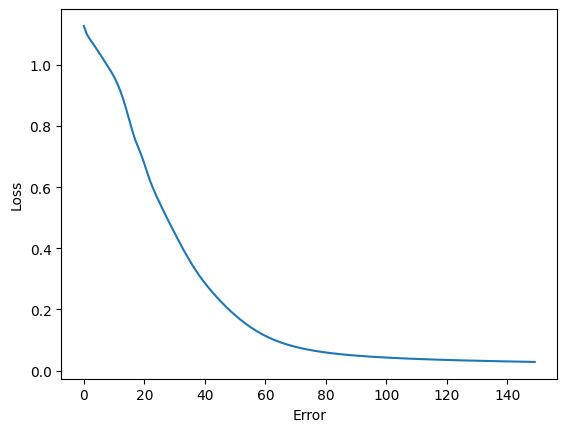

In [23]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Error')

In [24]:
# Model Evaluation
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = loss_funtion(y_eval, y_test)

In [25]:
loss

tensor(0.1498)

In [ ]:
total_correct = 0
map_list = [0,1,2]

with torch.no_grad():

    for i, value in enumerate(X_test):
        y_val = model.forward(value)
        print(f'{y_val} \t {y_val.argmax().item()} \t {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            total_correct += 1    

    print(f'\nTotal No of Correct answers: {total_correct}')

tensor([-3.9497,  1.7412,  5.6534]) 	 2 	 2
tensor([-5.8789, -0.7013,  9.3183]) 	 2 	 2
tensor([-5.7557,  0.5436,  8.9235]) 	 2 	 2
tensor([-1.2013,  6.1034,  0.3021]) 	 1 	 1
tensor([-4.7550,  1.3351,  7.0927]) 	 2 	 2
tensor([ 0.7096,  8.1452, -3.1046]) 	 1 	 1
tensor([-3.3784,  2.9362,  4.4984]) 	 2 	 2
tensor([-1.0350,  6.3594, -0.0206]) 	 1 	 1
tensor([-4.0507,  2.1529,  5.7657]) 	 2 	 2
tensor([-6.1260, -0.6704,  9.7370]) 	 2 	 2
tensor([-3.1902,  3.1274,  4.1479]) 	 2 	 2
tensor([ 14.1910,   6.3044, -16.0808]) 	 0 	 0
tensor([ 12.8027,   5.6455, -14.5183]) 	 0 	 0
tensor([ 1.6614,  7.5049, -4.2544]) 	 1 	 1
tensor([ 12.3209,   6.6126, -14.4021]) 	 0 	 0
tensor([-2.8949,  3.6853,  3.5598]) 	 1 	 2
tensor([ 12.6281,   6.1410, -14.5181]) 	 0 	 0
tensor([-3.7484,  2.1518,  5.2481]) 	 2 	 1
tensor([ 13.4944,   6.1035, -15.3350]) 	 0 	 0
tensor([ 11.2274,   5.8449, -13.0787]) 	 0 	 0
tensor([ 1.1163,  7.8459, -3.6097]) 	 1 	 1
tensor([-5.4434,  0.4271,  8.4058]) 	 2 	 2
tensor([ 12.62

In [27]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])